# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

### Импорт библиотек

In [1]:
# в этом разделе импортирую необходимые библиотеки и функции
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

### Загрузка данных

In [2]:
#выполню загрузку данных
#просмотрю
#найду пропуски и заменю их
data = pd.read_csv('/datasets/Churn.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


    RowNumber - порядковый номер, в построении модели он не понадобится
    CustomerId — уникальный идентификатор клиента, также не будет использован
    Surname - данные этого столбца также не будут использованы
    Geography, Gender - категориальные данные, приведу к численным
    Tenure - есть пропуски. Заполню 0, как недавно пришедший клиент.

In [5]:
data['Tenure']=data['Tenure'].fillna(0)

In [6]:
data['Tenure'].isna().sum()

0

In [7]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
data['Gender'].value_counts() # а вдруг

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


построю некоторые гистограммы, мб увижу что-то интересное...

(array([ 22.,  27.,  40.,  53.,  84.,  99., 132., 154., 200., 209., 273.,
        348., 327.,   0., 404., 418., 442., 447., 474., 456., 478., 477.,
        423., 432., 366., 321.,   0., 297., 257., 229., 226., 175., 168.,
        147., 134., 119., 102.,  74.,  84.,   0.,  82.,  70.,  75.,  67.,
         62.,  62.,  53.,  52.,  40.,  37.,  18.,  35.,  37.,   0.,  19.,
         22.,  18.,  27.,  21.,  13.,  18.,   9.,  11.,  10.,   5.,   4.,
          0.,   3.,   4.,   1.,   1.,   2.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   2.]),
 array([18.   , 18.925, 19.85 , 20.775, 21.7  , 22.625, 23.55 , 24.475,
        25.4  , 26.325, 27.25 , 28.175, 29.1  , 30.025, 30.95 , 31.875,
        32.8  , 33.725, 34.65 , 35.575, 36.5  , 37.425, 38.35 , 39.275,
        40.2  , 41.125, 42.05 , 42.975, 43.9  , 44.825, 45.75 , 46.675,
        47.6  , 48.525, 49.45 , 50.375, 51.3  , 52.225, 53.15 , 54.075,
        55.   , 55.925, 56.85 , 57.775, 58.7  , 59.625, 60.55 , 61.475,
        62.4  , 63.325

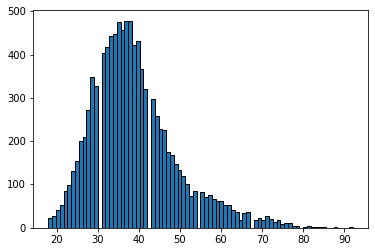

In [10]:
plt.hist(data['Age'], bins=80, edgecolor='black') 

Думаю также можно выделить группы - студент (18-28 лет, аспиранты сюда же), средний возраст (29-55 лет), пенсионер (56 и более). Распределение по возрастам нормальное.

(array([109., 104.,  99.,  85., 112.,  89., 106.,  90.,  97.,  96.,  93.,
         91.,  96., 117.,  94.,  94.,  95., 101., 102.,  85., 104.,  92.,
         90., 105., 107.,  95.,  96., 113., 111.,  93., 107., 103., 110.,
         99.,  88.,  96., 100., 101., 107., 116.,  98., 103., 109.,  95.,
        105.,  99., 122.,  98.,  87.,  86., 111., 121., 108.,  94., 102.,
         86.,  99., 103., 104.,  99., 108.,  97., 101., 110.,  89., 109.,
         96.,  95., 105.,  97., 105., 107.,  95., 112., 102.,  87.,  95.,
         78.,  89., 112.,  89., 101.,  85., 109.,  94., 103., 107., 103.,
        113., 105.,  94., 105.,  89.,  95.,  92., 101., 100.,  93., 108.,
        108.]),
 array([1.15800000e+01, 2.01138900e+03, 4.01119800e+03, 6.01100700e+03,
        8.01081600e+03, 1.00106250e+04, 1.20104340e+04, 1.40102430e+04,
        1.60100520e+04, 1.80098610e+04, 2.00096700e+04, 2.20094790e+04,
        2.40092880e+04, 2.60090970e+04, 2.80089060e+04, 3.00087150e+04,
        3.20085240e+04, 3.4008

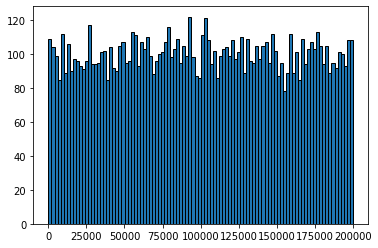

In [11]:
plt.hist(data['EstimatedSalary'], bins=100, edgecolor='black') 

(array([  8.,   3.,   3.,   3.,   2.,   7.,  28.,  31.,  54.,  46.,  57.,
         68.,  92., 100., 130., 149., 168., 216., 199., 226., 267., 237.,
        268., 329., 343., 359., 351., 366., 393., 397., 399., 394., 392.,
        414., 353., 363., 349., 285., 272., 256., 259., 195., 208., 147.,
        159., 125.,  91.,  73.,  70., 296.]),
 array([350., 360., 370., 380., 390., 400., 410., 420., 430., 440., 450.,
        460., 470., 480., 490., 500., 510., 520., 530., 540., 550., 560.,
        570., 580., 590., 600., 610., 620., 630., 640., 650., 660., 670.,
        680., 690., 700., 710., 720., 730., 740., 750., 760., 770., 780.,
        790., 800., 810., 820., 830., 840., 850.]),
 <BarContainer object of 50 artists>)

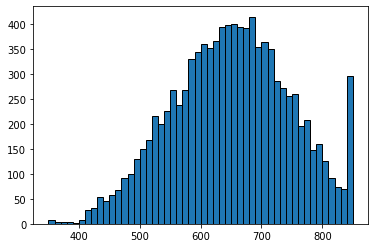

In [12]:
plt.hist(data['CreditScore'], bins=50, edgecolor='black')

(array([1291.,  952.,  950.,  928.,  885.,  927.,  881.,  925.,  933.,
         882.,  446.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

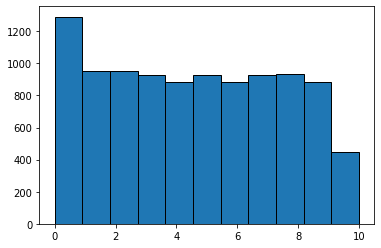

In [13]:
plt.hist(data['Tenure'], bins=11, edgecolor='black')

Не нашел чего-то особенного на чем необходимо заострить внимание. Преобразую категориальные переменные в количественные методом OHE.

In [14]:
data_ohe = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
data_ohe = pd.get_dummies(data_ohe, drop_first=True)
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


In [15]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Данные загружены. Категориальные данные преобразованы в количественные методом OHE. Могу перейти к исследованию задачи. Пропусков нет.

## Исследование задачи

Данная задача относится к классу задач бинарной классификации. Алгоритмы, которые подходят для обучения модели: LR, DT, RF. Для построения модели и ее тестирования разобью данные на 3 выборки: обучающую, валидационную и тестовую в соотношении 6:2:2. Целевой признак - data_ohe['Exited'], остальное - признаки.

In [16]:
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=1)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=1)

Посмотрю на облака точек признак-целевой признак. Мб есть что интересного.

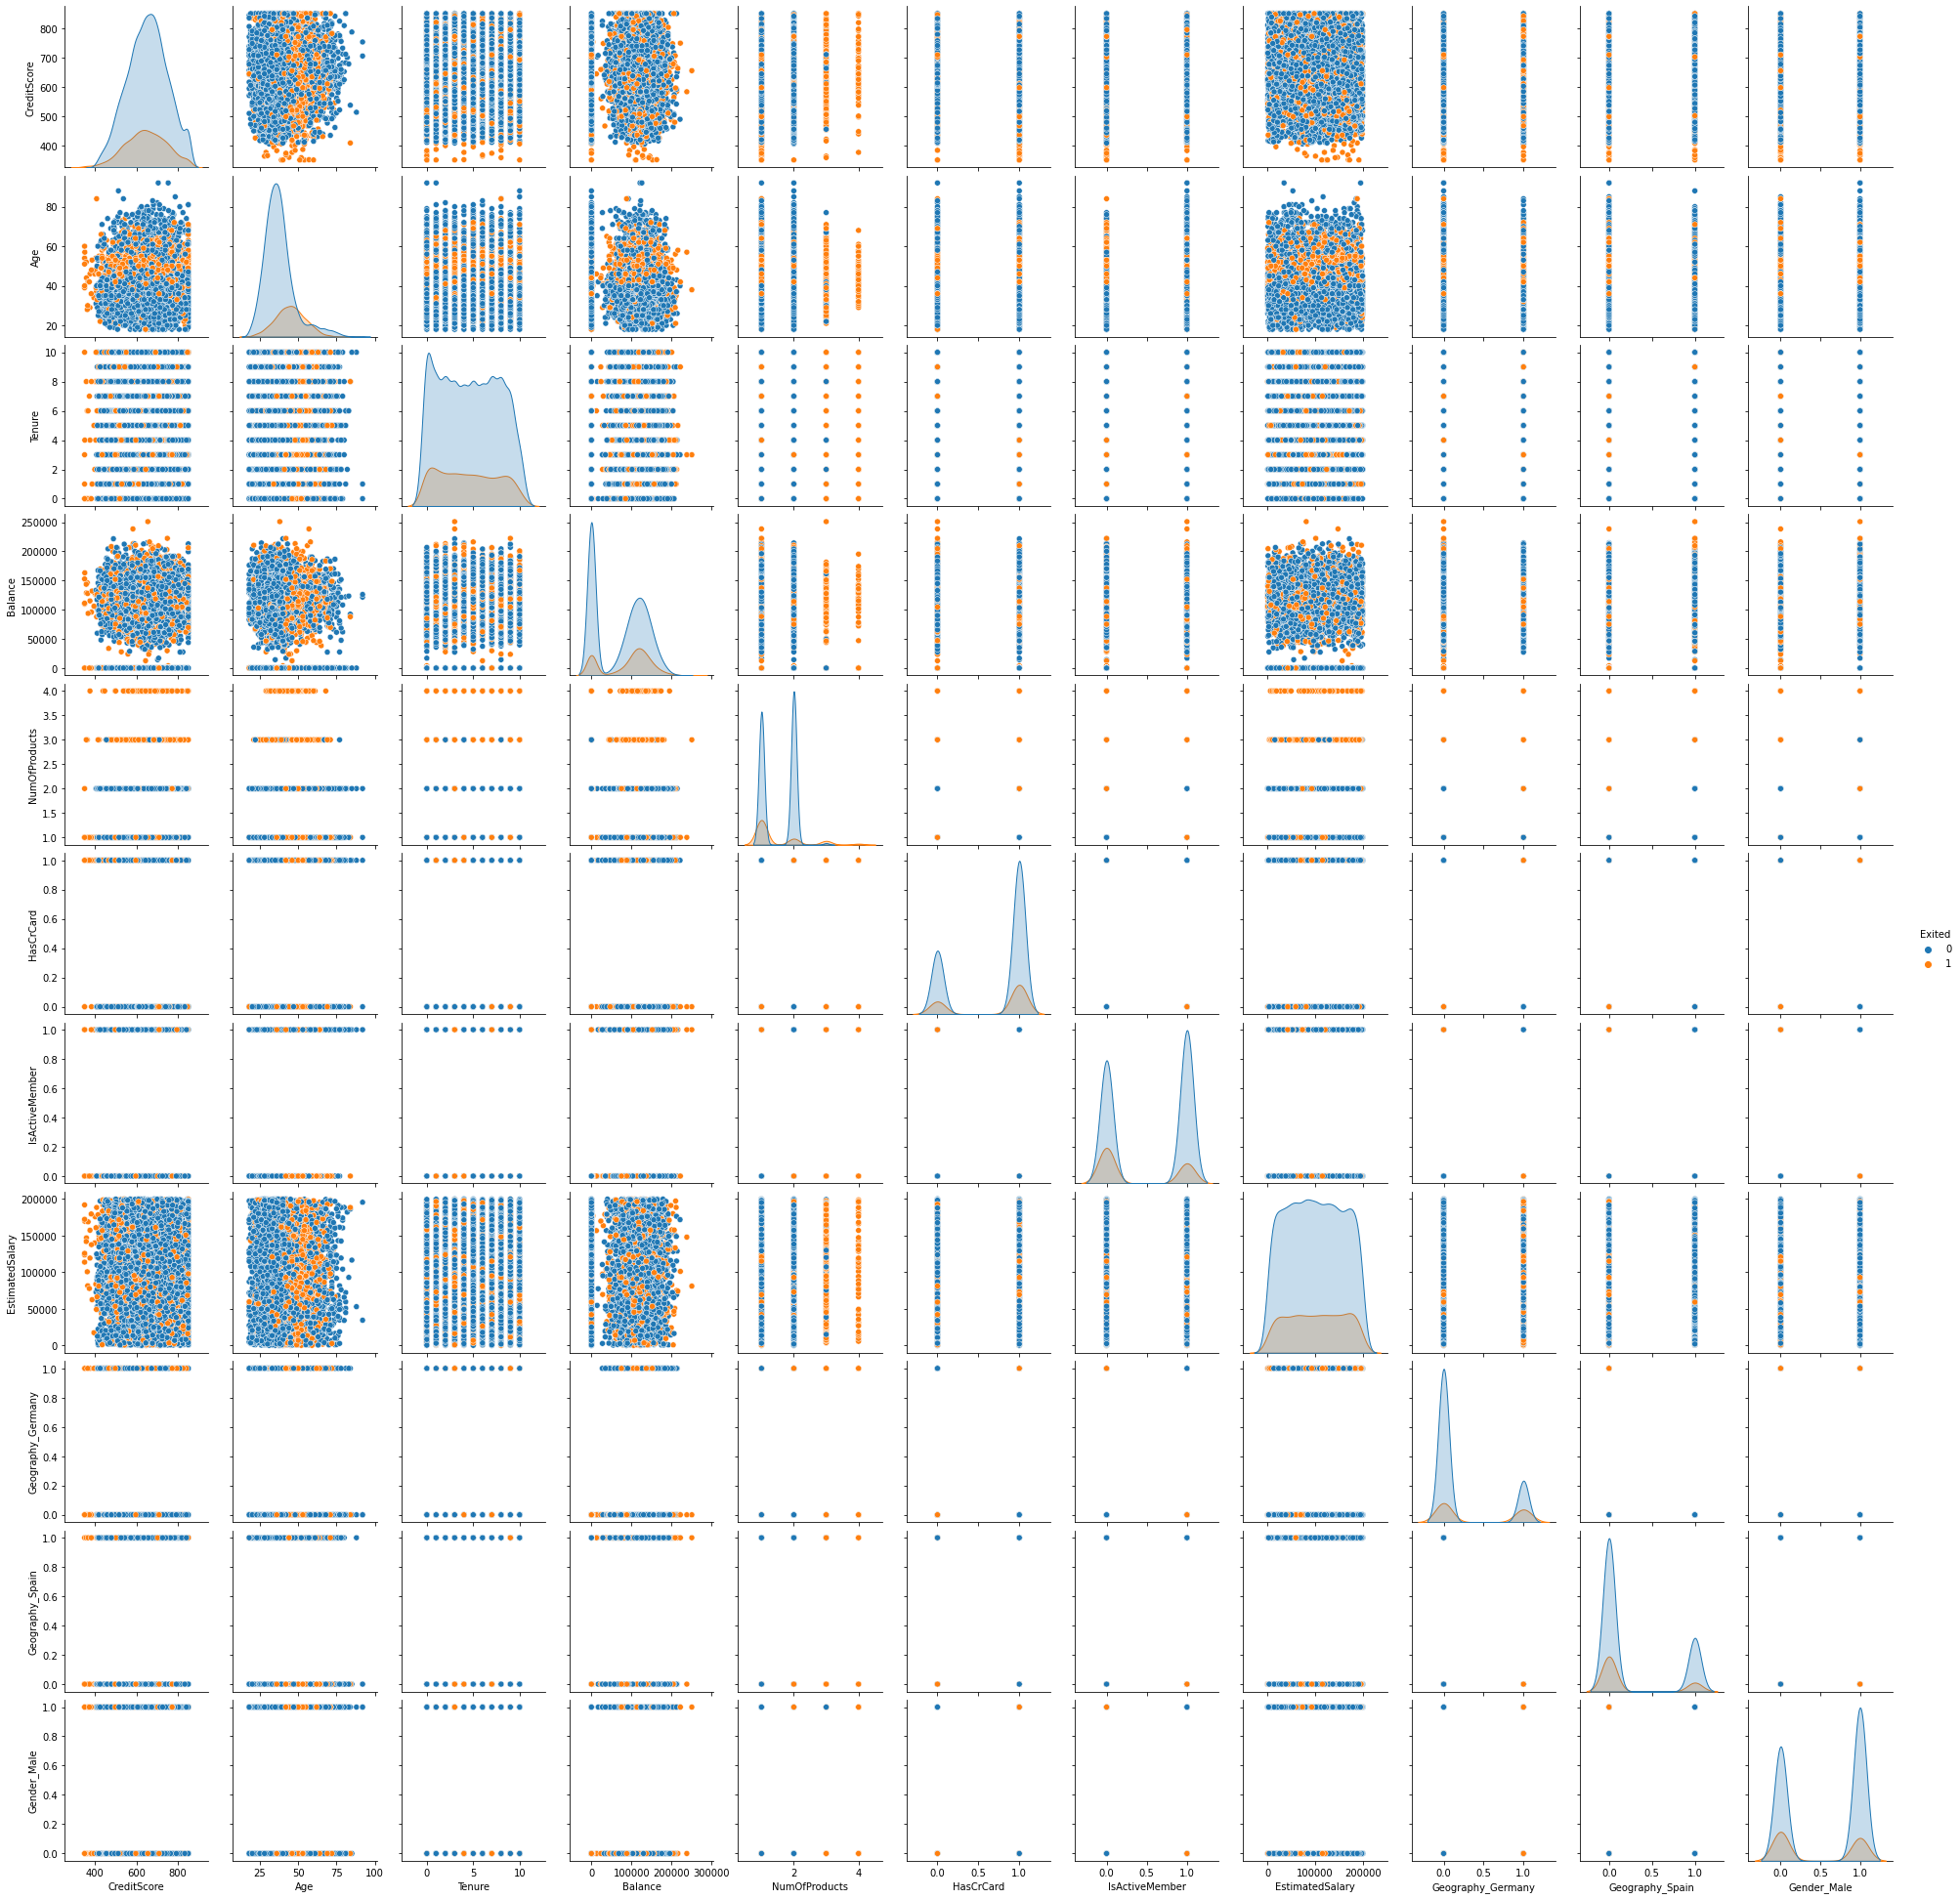

In [17]:
sns.pairplot(data_ohe, hue='Exited')

Ораньжеввые точки - клиент ушел. Синие - клиент остался. Интересно следующее: в среднем возраст ушедших из банка клиентов больше, чем возраст оставшихся клиентами банка (age-Exited). В остальных признаках среднее и дисперсия примерно одинаковые. Разная высота в графиках расположенных по-диагонали говорит о том, что значений 0 сильно выше, чем 1. Нужно будет сбалансировать классы. Так же я собираюсь использовать для обучения и метод LR, поэтому далее мне нужно будет также отнормировать нецелевые признаки.

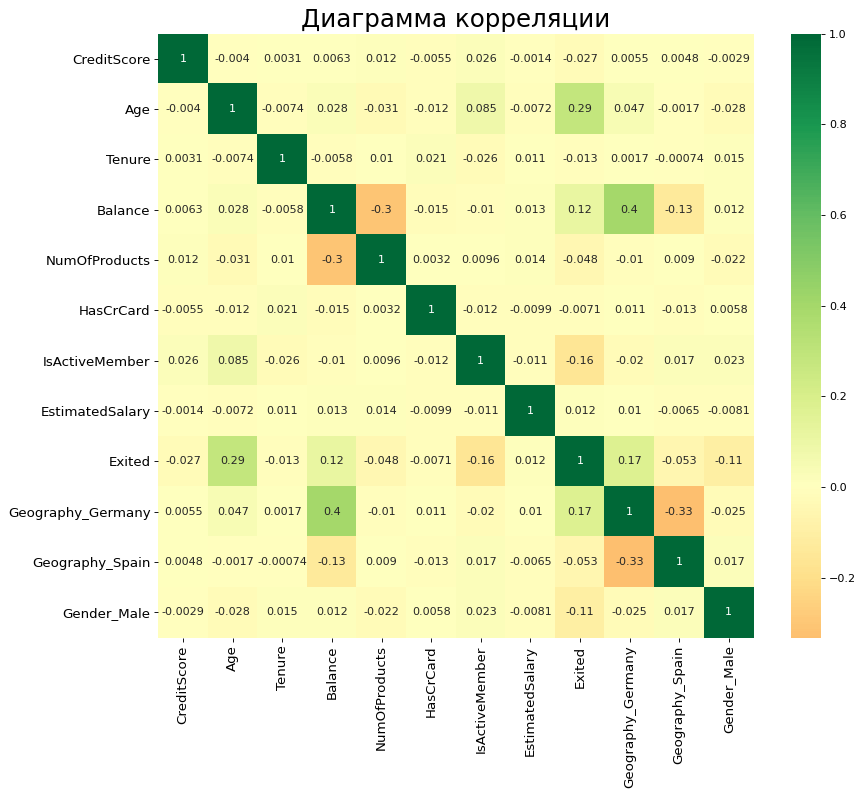

In [18]:
#так же построю диаграмму корреляции, мб есть явно зависимые признаки
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_ohe.corr(), xticklabels=data_ohe.corr().columns, yticklabels=data_ohe.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Сильных зависимостей одного признака от другого нет (макс. значение модуля коэф. корреляции Пирсона 0.4).

Обучу модель методом DT, RF и LR. И проверю точность и другие метрики на валидационной выборке.

In [19]:
model_DT = DecisionTreeClassifier(random_state=1)
model_DT.fit(features_train, target_train)
predicted_valid = model_DT.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
score = f1_score(predicted_valid, target_valid)
print("Точность модели DT:", accuracy_valid)
print("f1_score: {:.2f}".format(score))
confusion_matrix(predicted_valid, target_valid)

Точность модели DT: 0.775
f1_score: 0.48


array([[1342,  213],
       [ 237,  208]])

Достаточно хорошая точность. Посмотрю как распределен целевой признак. f1-мера меньше 0.5, что плохо.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

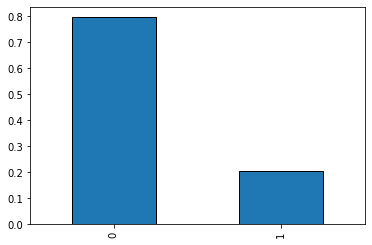

In [20]:
exited_fr = data_ohe['Exited'].value_counts(normalize=len(data_ohe['Exited']))
print(exited_fr)
exited_fr.plot(kind='bar', edgecolor='black')

    Данная гистограмма показывает частоту объектов класса Exited. ~80% клиентов банка из представленных данных остались в банке, 20% - ушли. Точность модели хуже, если бы предсказывали все значения константой равной 0. Здесь наблюдается дисбаланс классов. Что также видно из построенных раннее облаков признаков.

In [21]:
model_RF= RandomForestClassifier(random_state=1, max_depth=25, n_estimators=500)
model_RF.fit(features_train, target_train)
predicted_valid = model_RF.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
score = f1_score(target_valid, predicted_valid)
print("Точность модели RF:", accuracy_valid)
print("f1_score: {:.2f}".format(score))
confusion_matrix(predicted_valid, target_valid)

Точность модели RF: 0.867
f1_score: 0.61


array([[1529,  216],
       [  50,  205]])

In [22]:
best_params = None
best_score= 0

for params in tqdm(itertools.product(range(1, 25), range(1, 501, 50))):
    depth, n_est = params
    model_RF= RandomForestClassifier(random_state=1, max_depth=depth, n_estimators=n_est)
    model_RF.fit(features_train, target_train)
    predicted_valid = model_RF.predict(features_valid)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(target_valid, predicted_valid)
    if score>best_score:
        best_params = params
        best_score = score
print(f'f1-мера лучшей модели:{np.round(best_score, 3)}')
print(f'\nParams:\nmax_depth={best_params[0]}\nn_estimators={best_params[1]}')

240it [05:07,  1.28s/it]

f1-мера лучшей модели:0.611

Params:
max_depth=24
n_estimators=201


лучшая модель - модель с параметрами max_depth=24 и n_estimators=201. Random_state=1

Высокая точность у модели RF, но сравнимая с точностью предсказания константой. F1-мера тоже хорошая: по заданию нужно получить модель с F1-мерой выше 0.59. Можно так и оставить. Но, я еще не сбалансировал классы, мб получу модель с точностью более высокой и высокой f1-мерой.

In [23]:
model_LR= LogisticRegression(random_state=1, solver='liblinear')
model_LR.fit(features_train, target_train)
predicted_valid = model_LR.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
score = f1_score(target_valid, predicted_valid)
print("Точность модели LR:", accuracy_valid)
print("f1_score: {:.2f}".format(score))
confusion_matrix(predicted_valid, target_valid)

Точность модели LR: 0.789
f1_score: 0.01


array([[1575,  418],
       [   4,    3]])

Модель работает правильно (F1-мера положительна), но большое количество ошибок первого рода.  Точность ниже, чем у константной модели и F1-мера очень низкая. Модель не пригодна. Если добавить параметр class_weight='balanced', посмотрим как изменятся метрики.

In [24]:
model_LR = LogisticRegression(random_state=1, solver='liblinear', class_weight='balanced')
model_LR.fit(features_train, target_train)
predicted_valid = model_LR.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
score = f1_score(target_valid, predicted_valid)
print("Точность модели LR:", accuracy_valid)
print("f1_score: {:.2f}".format(score))
confusion_matrix(predicted_valid, target_valid)

Точность модели LR: 0.663
f1_score: 0.47


array([[1031,  126],
       [ 548,  295]])

Точность модели также низкая, но f1-мера стала более высокой.

In [25]:
model_RF= RandomForestClassifier(random_state=1, max_depth=25, n_estimators=500, class_weight='balanced')
model_RF.fit(features_train, target_train)
predicted_valid = model_RF.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
score = f1_score(target_valid, predicted_valid)
print("Точность модели RF:", accuracy_valid)
print("f1_score: {:.2f}".format(score))
confusion_matrix(predicted_valid, target_valid)

Точность модели RF: 0.8625
f1_score: 0.58


array([[1534,  230],
       [  45,  191]])

In [26]:
model_DT = DecisionTreeClassifier(random_state=1, class_weight='balanced')
model_DT.fit(features_train, target_train)
predicted_valid = model_DT.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
score = f1_score(predicted_valid, target_valid)
print("Точность модели DT:", accuracy_valid)
print("f1_score: {:.2f}".format(score))
confusion_matrix(predicted_valid, target_valid)

Точность модели DT: 0.7775
f1_score: 0.48


array([[1353,  219],
       [ 226,  202]])

Для LR результат улучшился, для RF и DT результат ухудшился - параметр class_weight='balanced' для последних работает на предложенных данных хуже.

## Борьба с дисбалансом

В моделях рассмотренных раннее низкая f1-мера. Наблюдается дисбаланс классов. Сбалансирую классы: методом upsampling добавлю объекты класса 1 и методом downsampling уменьшу количество объектов класса 0. Перемешаю. Отнормирую признаки, это важно для LR. Также циклом подберу гиберпараметры max_depth и n_estimators.

Увеличиваю частоту редкого класса и уменьшаяю частоту часто встречающегося класса и перемешаю данные. Для этого создам функцию и применю ее затем к данным features_train и target_train. В конечном итоге получу объем данных train такой же какой и был до применения функции, но с отнормированными признаками и сбалансированными классами целевого признака.

In [27]:
def up_down_mix(features, target, repeat, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1) # здесь перемешаны сбалансированные данные
    
    features_zeros = features_upsampled[target_upsampled == 0]
    features_ones = features_upsampled[target_upsampled == 1]
    target_zeros = target_upsampled[target_upsampled == 0]
    target_ones = target_upsampled[target_upsampled == 1]

    features_downsampled = pd.concat(
        [features_ones.sample(frac=fraction, random_state=1)] + [features_zeros.sample(frac=fraction, random_state=1)])
    target_downsampled = pd.concat(
        [target_ones.sample(frac=fraction, random_state=1)] + [target_zeros.sample(frac=fraction, random_state=1)])
    
    features_train_balance, target_train_balance = shuffle(
        features_downsampled, target_downsampled, random_state=1)

    return features_train_balance, target_train_balance

In [28]:
#метод upsamling
def def_up(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_up, target_up = shuffle(
        features_upsampled, target_upsampled, random_state=1) # здесь перемешаны сбалансированные данные
    return features_up, target_up

In [29]:
# метод downsampling
def def_down(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_ones] + [features_zeros.sample(frac=fraction, random_state=1)])
    target_downsampled = pd.concat(
        [target_ones] + [target_zeros.sample(frac=fraction, random_state=1)])
    
    features_down, target_down = shuffle(
        features_downsampled, target_downsampled, random_state=1)

    return features_down, target_down

In [30]:
# выборка features_train_up должна увеличиться в 1.6 раза
# выборка features_train_down должна уменьшиться в 2.5 раза
repeat = 4
fraction = 0.25

In [31]:
features_train_up, target_train_up = def_up(features_train, target_train, repeat)
features_train_down, target_train_down = def_down(features_train, target_train, fraction)
print('Объем несбалансированных и ненормированных данных:')
print(features_train.shape)
print(target_train.shape)
print('Объем сбалансированных и нормированных данных (метод_up_sampling):')
print(features_train_up.shape)
print(target_train_up.shape)
print('Объем сбалансированных и нормированных данных (метод_down_sampling):')
print(features_train_down.shape)
print(target_train_down.shape)

Объем несбалансированных и ненормированных данных:
(6000, 11)
(6000,)
Объем сбалансированных и нормированных данных (метод_up_sampling):
(9588, 11)
(9588,)
Объем сбалансированных и нормированных данных (метод_down_sampling):
(2397, 11)
(2397,)


In [53]:
features_train_up.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7985,0.692,0.121622,0.2,0.383141,0.333333,1,1,0.029478,1,0,0
7100,0.600,0.081081,0.0,0.433968,0.000000,1,0,0.522321,0,1,1
3074,0.528,0.351351,0.6,0.473164,0.000000,1,0,0.667901,1,0,0
8227,1.000,0.162162,0.3,0.000000,0.333333,1,0,0.583358,0,0,0
8511,0.586,0.135135,0.9,0.641129,0.333333,1,0,0.135370,1,0,1


In [55]:
target_train_up.head(5)

7985    0
7100    0
3074    1
8227    0
8511    0
Name: Exited, dtype: int64

In [54]:
features_train_down.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3395,0.818,0.063492,0.5,0.000000,0.000000,1,0,0.111124,0,0,0
3456,0.726,0.238095,0.6,0.377039,0.000000,0,0,0.987737,0,0,1
5188,0.626,0.190476,0.4,0.000000,0.666667,1,0,0.506703,0,1,1
7570,0.694,0.222222,0.7,0.699347,0.666667,1,0,0.582106,0,0,1
2453,0.866,0.650794,0.9,0.503092,0.000000,1,1,0.021673,0,1,0


In [61]:
target_train_down.head(5)

3395    0
3456    1
5188    0
7570    1
2453    0
Name: Exited, dtype: int64

0    0.501043
1    0.498957
Name: Exited, dtype: float64


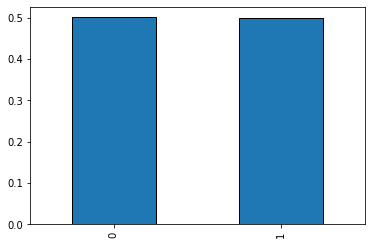

0    4804
1    4784
Name: Exited, dtype: int64


In [60]:
exited = target_train_up.value_counts(normalize=len(target_train_up))
print(exited)
exited.plot(kind='bar', edgecolor='black')
plt.show()
print(target_train_up.value_counts())

0    0.501043
1    0.498957
Name: Exited, dtype: float64


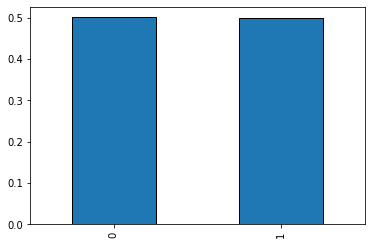

0    1201
1    1196
Name: Exited, dtype: int64


In [59]:
exited = target_train_down.value_counts(normalize=len(target_train_down))
print(exited)
exited.plot(kind='bar', edgecolor='black')
plt.show()
print(target_train_down.value_counts())

In [32]:
#нормировка данных
scaler = MinMaxScaler()
numeric = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary'] # в этих столбцах данные - количественные
scaler.fit(features_train_up[numeric])
features_valid_up = features_valid
features_train_up[numeric] = scaler.transform(features_train_up[numeric])
features_valid_up[numeric] = scaler.transform(features_valid_up[numeric])



In [33]:
#нормировка данных тоже самое, только уже для сбалансированных данных методом downsampling
scaler = MinMaxScaler()
scaler.fit(features_train_down[numeric])
features_valid_down = features_valid
features_train_down[numeric] = scaler.transform(features_train_down[numeric])
features_valid_down[numeric] = scaler.transform(features_valid_down[numeric])

pd.options.mode.chained_assignment = None

In [34]:
#данные для обучения features_train_up, target_train_up и features_train_down, target_train_down

Точность модели DT: 0.711
f1_score: 0.38
Best_max_depth: 4


array([[1535,  395],
       [  44,   26]])

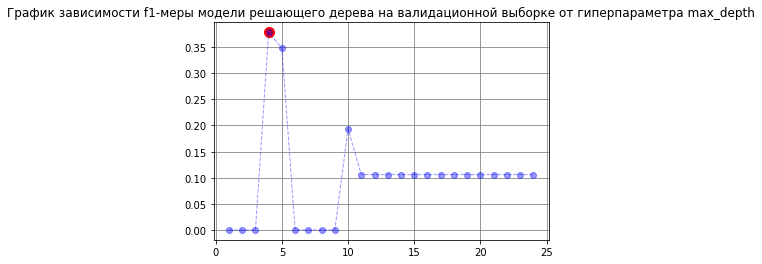

In [64]:
# обучу на новых нормированных и сбалансированных данных модель методами DT, RF и LR
# DT данные features_train_up, target_train_up
best_max_depth = 0
best_model_DT = None
best_f1_score = 0
best_accuracy = 0
score_array = []
depth_array = []
predicted_valid_s=0
for i in range(1, 25):
    model_DT = DecisionTreeClassifier(random_state=1, max_depth=i)
    model_DT.fit(features_train_up, target_train_up)
    predicted_valid = model_DT.predict(features_valid_up)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(predicted_valid, target_valid)
    score_array.append(score)
    depth_array.append(i)
    if score>best_f1_score:
        best_model_DT=model_DT
        best_max_depth=i
        best_f1_score=score
        best_accuracy = accuracy_valid
        predicted_valid_s =predicted_valid
    
print("Точность модели DT:", best_accuracy)
print("f1_score: {:.2f}".format(best_f1_score))
print("Best_max_depth:", best_max_depth)
display(confusion_matrix(predicted_valid, target_valid))
# построим график F1-мера(максимальной глубины дерева решений)
plt.plot(depth_array, score_array, 'o--', color='blue', alpha=0.4, linewidth=1)
plt.grid(axis='x', color='0.5')
plt.grid(axis='y', color='0.5')
plt.scatter(best_max_depth,  best_f1_score, color='red', s=100, marker='o')
plt.title("График зависимости f1-меры модели решающего дерева на валидационной выборке от гиперпараметра max_depth")
plt.show()

При max_depth>4 модель переобучается.

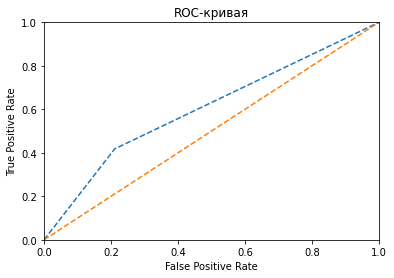

0.604


In [36]:
probabilities_valid = best_model_DT.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

Точность модели DT: 0.711
f1_score: 0.38
Best_max_depth: 4


array([[1246,  245],
       [ 333,  176]])

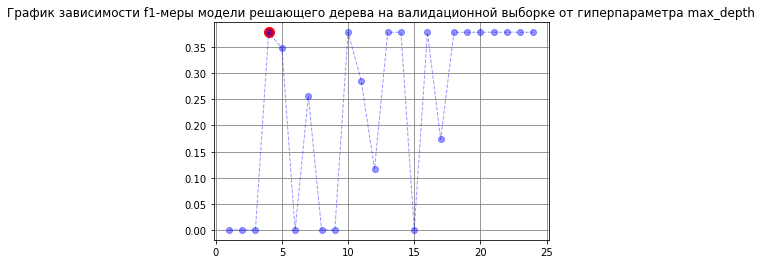

In [63]:
# DT данные features_train_down, target_train_down
best_max_depth = 0
best_model_DT = None
best_f1_score = 0
score_array = []
depth_array = []
best_accuracy = 0
predicted_valid_s=0
for i in range(1, 25):
    model_DT = DecisionTreeClassifier(random_state=1, max_depth=i)
    model_DT.fit(features_train_down, target_train_down)
    predicted_valid = model_DT.predict(features_valid_down)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(predicted_valid, target_valid)
    score_array.append(score)
    depth_array.append(i)
    if score>best_f1_score:
        best_model_DT=model_DT
        best_max_depth=i
        best_f1_score=score
        best_accuracy = accuracy_valid
        predicted_valid_s=predicted_valid
    
print("Точность модели DT:", best_accuracy)
print("f1_score: {:.2f}".format(best_f1_score))
print("Best_max_depth:", best_max_depth)
display(confusion_matrix(predicted_valid, target_valid))
# построим график F1-мера(максимальной глубины дерева решений)
plt.plot(depth_array, score_array, 'o--', color='blue', alpha=0.4, linewidth=1)
plt.grid(axis='x', color='0.5')
plt.grid(axis='y', color='0.5')
plt.scatter(best_max_depth,  best_f1_score, color='red', s=100, marker='o')
plt.title("График зависимости f1-меры модели решающего дерева на валидационной выборке от гиперпараметра max_depth")
plt.show()

При max_depth>17 f1-мера модели остается постоянной.

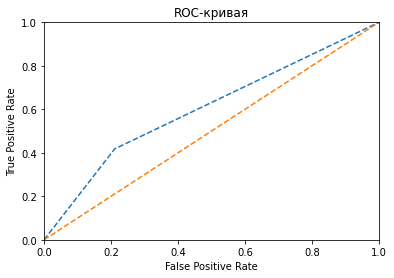

0.604


In [39]:
probabilities_valid = best_model_DT.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

    Вывод:
    1. Результаты модели оценивались на валидационной выборке. Обученная модели на сбалансированных данных методом upsampling дает результат такой же как и модель, обученная на сбалансированных данных методом downsampling.
    2. f1-Мера и auc-roc одинаковы для обеих моделей.
    3. auc-roc-мера выше чем для случайной модели.

Точность модели LR: 0.7895
f1_score: 0.000
Best_max_iter: 1000


array([[1579,  421],
       [   0,    0]])

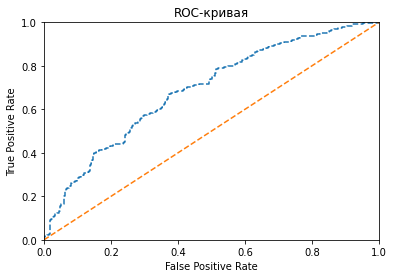

0.688


In [71]:
# LR данные features_train_up, target_train_up
best_max_iter = 0
best_model_LR = None
best_f1_score = 0
best_accuracy = 0
predicted_valid_s=0
for i in range(10, 1001, 10):
    model_LR = LogisticRegression(random_state=1, solver='liblinear', max_iter=i)
    model_LR.fit(features_train_up, target_train_up)
    predicted_valid = model_LR.predict(features_valid)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(predicted_valid, target_valid)
    if score>=best_f1_score:
        best_model_LR=model_LR
        best_f1_score=score
        best_max_iter=i
        best_accuracy = accuracy_valid
        predicted_valid_s = predicted_valid
        
print("Точность модели LR:", best_accuracy)
print("f1_score: {:.3f}".format(best_f1_score))
print("Best_max_iter:", best_max_iter)
display(confusion_matrix(predicted_valid, target_valid))

probabilities_valid = best_model_LR.predict_proba(features_valid_up)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

Все результаты модель предсказывает как 0. Поэтому получаем большое количество ошибок первого рода.

Точность модели LR: 0.7895
f1_score: 0.000
Best_max_iter: 1000


array([[1579,  421],
       [   0,    0]])

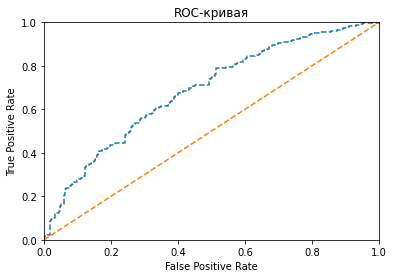

0.686


In [67]:
# LR данные features_train_down, target_train_down
best_max_iter = 0
best_model_LR = None
best_f1_score = 0
best_accuracy = 0
predicted_valid_s=0
for i in range(10, 1001, 10):
    model_LR = LogisticRegression(random_state=1, solver='liblinear', max_iter=i)
    model_LR.fit(features_train_down, target_train_down)
    predicted_valid = model_LR.predict(features_valid)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(predicted_valid, target_valid)
    if score>=best_f1_score:
        best_model_LR=model_LR
        best_f1_score=score
        best_max_iter=i
        best_accuracy = accuracy_valid
        predicted_valid_s = predicted_valid
print("Точность модели LR:", best_accuracy)
print("f1_score: {:.3f}".format(best_f1_score))
print("Best_max_iter:", best_max_iter)
display(confusion_matrix(predicted_valid, target_valid))

probabilities_valid = best_model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

Все результаты модель предсказывает как 0. Поэтому получаем большое количество ошибок первого рода и нет ошибок второго рода.

    Вывод:
    1. Обе модели обученные методом LR показывают на валидационных данных f1-меру 0, но точность выше чем для DT.
    2. Показатели auc-roc - одинаков и выше чем у DT: 0.69 (0.60)

152it [03:15,  1.29s/it]

Точность лучшей модели RF:0.554
f1-мера лучшей модели:0.406

Params:
max_depth=8
n_estimators=1


array([[1579,  421],
       [   0,    0]])

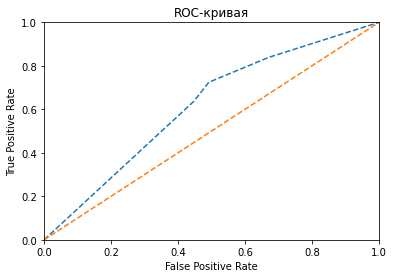

0.615


In [74]:
#обучу модель методом RF - данные features_train_up, target_train_up
best_max_depth = 0
best_model_RF = None
best_score = 0
best_n_estimators=0
accuracy_valid_best=0
predicted_valid_s = 0
for params in tqdm(itertools.product(range(1, 50), range(1, 501, 50))):
    depth, n_est = params
    model_RF= RandomForestClassifier(random_state=1, max_depth=depth, n_estimators=n_est)
    model_RF.fit(features_train_up, target_train_up)
    predicted_valid = model_RF.predict(features_valid_up)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(target_valid, predicted_valid)
    if score>best_score:
        best_model_RF = model_RF
        best_params = params
        best_score = score
        accuracy_valid_best = accuracy_valid
        predicted_valid_s = predicted_valid

print(f'Точность лучшей модели RF:{np.round(accuracy_valid_best, 3)}')
print(f'f1-мера лучшей модели:{np.round(best_score, 3)}')
print(f'\nParams:\nmax_depth={best_params[0]}\nn_estimators={best_params[1]}')
display(confusion_matrix(predicted_valid, target_valid))
#ROC-curve
probabilities_valid = best_model_RF.predict_proba(features_valid_down)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

152it [01:20,  1.90it/s]

Точность лучшей модели RF:0.246
f1-мера лучшей модели:0.351

Params:
max_depth=14
n_estimators=1


array([[1419,  407],
       [ 160,   14]])

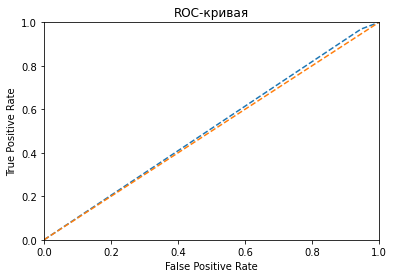

0.511


In [75]:
#обучу модель методом RF - данные features_train_down, target_train_down
best_max_depth = 0
best_model_RF = None
best_f1_score = 0
best_n_estimators=0
best_accuracy =0
score=0
predicted_valid_s = 0

for params in tqdm(itertools.product(range(1, 20), range(1, 401, 50))):
    depth, n_est = params
    model_RF= RandomForestClassifier(random_state=1, max_depth=depth, n_estimators=n_est)
    model_RF.fit(features_train_down, target_train_down)
    predicted_valid = model_RF.predict(features_valid_down)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(target_valid, predicted_valid)
    if score>best_f1_score:
        best_model_RF = model_RF
        best_params = params
        best_f1_score = score
        best_accuracy = accuracy_valid
        predicted_valid_s = 0
        

print(f'Точность лучшей модели RF:{np.round(best_accuracy, 3)}')
print(f'f1-мера лучшей модели:{np.round(best_f1_score, 3)}')
print(f'\nParams:\nmax_depth={best_params[0]}\nn_estimators={best_params[1]}')
display(confusion_matrix(predicted_valid, target_valid))
#ROC-curve
probabilities_valid = best_model_RF.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

    Вывод:
    1. RF - показывает также низкие результаты. Обученная на сбалансированных данных методом downsampling модель ведет себя как случайная.
    2. Метрики моделей близки к случайным - auc-roc=0.51
        

In [76]:
repeat = round(exited_fr[0]/exited_fr[1])
print('повторить:', repeat) # во сколько раз класс "1" больше класса "0"
fraction = round((repeat+1)/(repeat*2), 4)
print('отсечь:', fraction)

повторить: 4
отсечь: 0.625


In [85]:
# Не знаю почему, но без этого куска дальше все ломается...
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=1)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=1)

In [86]:
features_train_balanced, target_train_balanced = up_down_mix(features_train, target_train, repeat, fraction)
print('Объем несбалансированных и ненормированных данных:')
print(features_train.shape)
print(target_train.shape)
print('Объем сбалансированных и нормированных данных:')
print(features_train_balanced.shape)
print(target_train_balanced.shape)

Объем несбалансированных и ненормированных данных:
(6000, 11)
(6000,)
Объем сбалансированных и нормированных данных:
(5992, 11)
(5992,)


0    0.501001
1    0.498999
Name: Exited, dtype: float64


<AxesSubplot:>

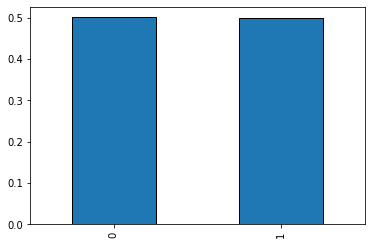

In [87]:
exited = target_train_balanced.value_counts(normalize=len(target_train_balanced))
print(exited)
exited.plot(kind='bar', edgecolor='black')

Классы целевого признака сбалансированы. Их доли одинаковы.

Приведем к одному масштабу количественные признаки.

In [88]:
features_train_balanced.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1448,555,46,4.0,120392.99,1,1,0,177719.88,1,0,0
3233,595,36,6.0,85768.42,1,1,1,24802.77,0,1,1
5279,652,40,7.0,100471.34,1,1,1,124550.88,0,1,0
5567,676,28,1.0,69459.05,2,1,1,128461.29,1,0,1
930,661,39,6.0,132628.98,1,0,0,38812.67,0,1,1


In [89]:
scaler = MinMaxScaler()
numeric = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary'] # в этих столбцах данные - количественные
scaler.fit_transform(features_train_balanced[numeric])
features_train_balanced[numeric] = scaler.transform(features_train_balanced[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

In [90]:
display(features_train_balanced.head(5))
display(features_valid.head(5))
display(features_test.head(5))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1448,0.410,0.378378,0.4,0.479848,0.000000,1,0,0.889159,1,0,0
3233,0.490,0.243243,0.6,0.341846,0.000000,1,1,0.123697,0,1,1
5279,0.604,0.297297,0.7,0.400447,0.000000,1,1,0.623009,0,1,0
5567,0.652,0.135135,0.1,0.276842,0.333333,1,1,0.642583,1,0,1
930,0.622,0.283784,0.6,0.528617,0.000000,0,0,0.193827,0,1,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
526,0.702,0.337838,0.0,0.000000,0.333333,1,1,0.827007,0,0,1
5679,0.856,0.202703,0.4,0.442665,0.333333,1,0,0.417803,1,0,0
854,0.650,0.527027,0.8,0.000000,0.333333,0,1,0.477404,0,0,0
2273,0.752,0.121622,0.7,0.493531,0.000000,0,1,0.394846,0,1,0
9886,0.650,0.175676,0.2,0.362005,0.333333,1,0,0.301241,0,1,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4659,0.120,0.432432,0.0,0.407651,0.333333,1,0,0.449168,1,0,0
1984,0.362,0.364865,0.1,0.504171,0.333333,1,1,0.824192,0,1,0
6022,0.688,0.229730,0.7,0.000000,0.000000,1,0,0.668158,0,1,0
3942,0.598,0.027027,0.0,0.000000,0.333333,1,1,0.291423,0,1,1
1206,0.468,0.189189,0.5,0.000000,0.333333,1,0,0.054388,0,1,1


Теперь все значения количественных данных перенесены на отрезок от 0 до 1. Выбрана данный метод масштабирования - все значения количественных признаки лежат в области положительных чисел и не распределены нормально.

Обучим методами DT, RF, LR модели на сбалансированных и отмасштабированных данных. В цикле переберем оптимальные параметры. Также для найду оптимальный порог классификации.

Точность модели DT: 0.758
f1_score: 0.60
Best_max_depth: 8


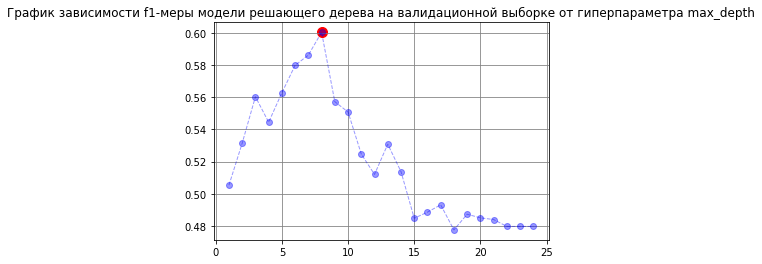

In [91]:
#DT
best_max_depth = 0
best_model_DT = None
best_f1_score = 0
score_array = []
depth_array = []
for i in range(1, 25):
    model_DT = DecisionTreeClassifier(random_state=1, max_depth=i)
    model_DT.fit(features_train_balanced, target_train_balanced)
    predicted_valid = model_DT.predict(features_valid)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(predicted_valid, target_valid)
    score_array.append(score)
    depth_array.append(i)
    if score>best_f1_score:
        best_model_DT=model_DT
        best_max_depth=i
        best_f1_score=score
    
print("Точность модели DT:", accuracy_valid)
print("f1_score: {:.2f}".format(best_f1_score))
print("Best_max_depth:", best_max_depth)

# построим график F1-мера(максимальной глубины дерева решений)
plt.plot(depth_array, score_array, 'o--', color='blue', alpha=0.4, linewidth=1)
plt.grid(axis='x', color='0.5')
plt.grid(axis='y', color='0.5')
plt.scatter(best_max_depth,  best_f1_score, color='red', s=100, marker='o')
plt.title("График зависимости f1-меры модели решающего дерева на валидационной выборке от гиперпараметра max_depth")
plt.show()

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Индикаторы состояния: progress и tqdm <a class="tocSkip"> </h3>

Как перестать беспокоиться о том, не завис ли скрипт? Вы можете создавать свои индикаторы состояния. Это весьма увлекательное занятие. Но делать то же самое с [progress](https://pypi.org/project/progress/) (ее обычно используют для работы из консоли) или [tqdm](https://pypi.org/project/tqdm/) (отлично подойдет для тетрадок) куда быстрее и надежнее.

Обычно я использую эти две библиотеки, но вот [здесь](https://habr.com/ru/post/483400/) ты можешь почитать про альтернативные варианты

![](https://i.ibb.co/B4SDm8Y/68747470733a2f2f7261772e6769746875622e636f6d2f7665726967616b2f70726f67726573732f6d61737465722f64656d.gif)

Для лучшей модели best_model_DT посмотрю как изменяется f1-мера при изменении порога классификации.

Построю roc-кривую и получу значение auc-roc для модели DT.

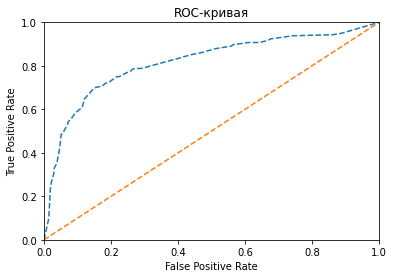

0.817


In [92]:
probabilities_valid = best_model_DT.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

Значение площади под ROC-кривой модели best_model_DT - 0.82. Данная модель по метрике AUC_ROC значительно лучше случайной модели предсказывает останется или уйдет клиент. Классы сбалансированы, поэтому AUC_ROC дает адекватную оценку алгоритма.

DecisionTreeClassifier(max_depth=8, random_state=1)


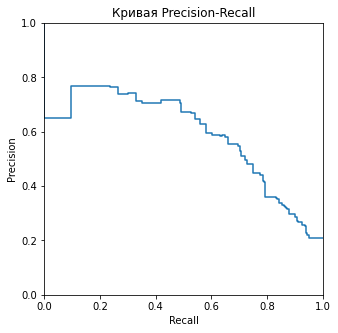

In [93]:
#построим PR-кривую для модели решающего дерева с оптимальными гиперпараметрами
print(best_model_DT)
probabilities_valid = best_model_DT.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

Зависимость точности от полноты для модели best_model_DT. Точность модели падает с увеличением полноты.

In [94]:
#обучу модель методом RF, в цикле также переберу параметры max_depth и n_estimators
best_max_depth = 0
best_model_RF = None
best_f1_score = 0
best_n_estimators=0
for i in range(1, 25):
    for j in range(1, 501, 50):
        model_RF = RandomForestClassifier(random_state=1, max_depth=i, n_estimators=j)
        model_RF.fit(features_train_balanced, target_train_balanced)
        predicted_valid = model_RF.predict(features_valid)
        accuracy_valid = accuracy_score(predicted_valid, target_valid)
        score = f1_score(predicted_valid, target_valid)
        if score>best_f1_score:
            best_model_RF=model_RF
            best_max_depth=i
            best_f1_score=score
            best_n_estimators=j
    
print("Точность лучшей модели RF:", accuracy_valid)
print("f1_score: {:.3f}".format(best_f1_score))
print("Best_max_depth:", best_max_depth)
print("Best_n_estimators:", best_n_estimators)
print(best_model_RF)

Точность лучшей модели RF: 0.836
f1_score: 0.639
Best_max_depth: 21
Best_n_estimators: 401
RandomForestClassifier(max_depth=21, n_estimators=401, random_state=1)


Аналогично построим ROC-кривую и посчитаем площадь под ней для модели случайного леса с оптимальными параметрами.

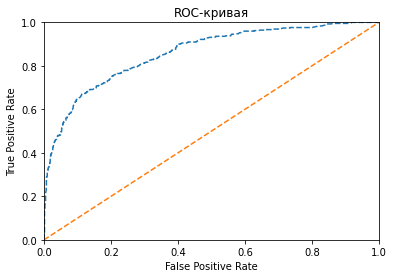

0.859


In [95]:
probabilities_valid = best_model_RF.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

Обучу модель методом логистической регрессии.

In [96]:
#обучу модель методом логистической регрессии (LR). В цикле переберу гиперпараметр max_iter, критерий отбора также будет по f1-мере.
best_max_iter = 0
best_model_LR = None
best_f1_score = 0
accuracy_valid=0
for i in range(1, 1001, 10):
    model_LR = LogisticRegression(random_state=1, solver='liblinear', max_iter=i)
    model_LR.fit(features_train_balanced, target_train_balanced)
    predicted_valid = model_LR.predict(features_valid)
    accuracy_valid = accuracy_score(predicted_valid, target_valid)
    score = f1_score(predicted_valid, target_valid)
    if score>best_f1_score:
        best_model_LR=model_LR
        best_f1_score=score
        best_max_iter=i
        
print("Точность модели LR:", accuracy_valid)
print("f1_score: {:.3f}".format(best_f1_score))
print("Best_max_iter:", best_max_iter)
print(best_model_LR)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Точность модели LR: 0.71
f1_score: 0.509
Best_max_iter: 11
LogisticRegression(max_iter=11, random_state=1, solver='liblinear')


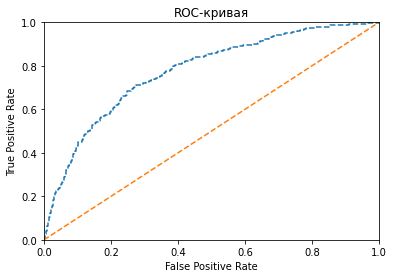

0.775


In [97]:
probabilities_valid = best_model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(round(auc_roc, 3))

Точность модели best_model_LR обученной на отнормированных данных и сбалансированных классов выше, чем у модели логистической регресси обученной с гиперпараметром class_weight='balanced' (f1-мера выше), но все еще значительно ниже, чем у моделей обученных методами дерева решений и случайного леса. По параметру auc_roc - модель best_model_LR также значительно дальше от идеальной, нежели обученные модели другими методами.

### Выводы

    1. Модель с максимальной f1-мерой получена методом случайного леса.
    2. Обучении моделей велось на сбалансированных классах, нормированных данных. Проверка модели - на нормированных данных и несбалансированных объектах.
    3. На валидационных данных модель случайного леса классифицируют пары объектов лучше остальных (86% верно). В валидационных данных классы не сбалансированы, поэтому модели оценивались по параметру AUC-ROC.
    4. Получена оптимальная модель: best_model_RF.

## Тестирование модели

    Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
    В данном пункте тестирую только лучшую полученную модель - best_model_RF. best_model_RF наиболее близкая по мере AUC-ROC к идеальной модели. Из всех моделей на валидационной выборке best_model_RF имеет наибольшую f1-меру - 0.64. Эта модель обучена методом случайного леса с гиперпараметрами: 
    max_depth = 21, 
    n_estimators = 401, 
    random_state = 1.

In [98]:
print(best_model_RF)
predicted_test = best_model_RF.predict(features_test)
accuracy_test = accuracy_score(predicted_test, target_test)
score = f1_score(predicted_test, target_test) 
print("Точность лучшей модели RF на тестовой выборке:", accuracy_test)
print("f1_score: {:.3f}".format(score))

RandomForestClassifier(max_depth=21, n_estimators=401, random_state=1)
Точность лучшей модели RF на тестовой выборке: 0.842
f1_score: 0.624


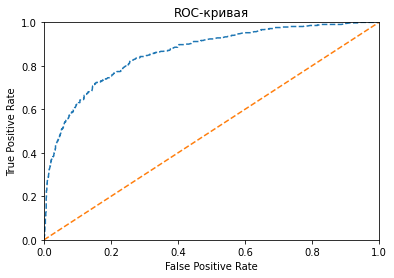

0.8605


In [99]:
probabilities_test = best_model_RF.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(round(auc_roc, 4))

    По результатам задачи можно сформулировать следующие выводы:
    1. Наилучшая модель согласно метрики f1-мера, это модель обученная алгоритмом случайного леса с гиперпараметрами max_depth=21, n_estimators=401, random_state=1.
    2. На тестовой выборке модель выдает следующий результат: f1-мера=0.624. (Точность модели 0.84, что выше константной модели для тестовой выборки, но этот параметр некорректен для сравнения в данной задачи).
    3. AUC-ROC лучшей модели случайного леса равен 0.86, т.е. модель на тестовой выборке 86% пар объектов классифицировала верно. В тестовой выборке классы не сбалансированы, поэтому оценка модели по параметру AUC-ROC является наиболее адекватной.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>